In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from itertools import cycle
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import os

In [107]:
dataset=pd.read_excel(r"C:\Users\Ramana Reddy (Rakhi)\OneDrive\Desktop\crypto project\makar coin.xlsx")
dataset

,ticker,date,open,high,low,close
0,MKR,2018-01-01,1005.75,1051.12,945.25,1020.87
1,MKR,2018-01-02,1180.90,1189.52,1017.12,1034.36
2,MKR,2018-01-03,1129.32,1298.72,1082.26,1082.26
3,MKR,2018-01-04,1086.55,1171.59,944.83,944.83
4,MKR,2018-01-05,1063.84,1083.19,967.13,1015.49
...,...,...,...,...,...,...
2366,MKR,2024-06-26,2373.94,2498.94,2326.68,2464.30
2367,MKR,2024-06-27,2464.06,2671.10,2443.23,2604.31
2368,MKR,2024-06-28,2605.58,2652.80,2506.90,2514.27
2369,MKR,2024-06-29,2514.13,2564.56,2439.21,2445.96


In [108]:
dataset.shape

(2371, 6)

In [109]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ticker  2371 non-null   object        
 1   date    2371 non-null   datetime64[ns]
 2   open    2371 non-null   float64       
 3   high    2371 non-null   float64       
 4   low     2371 non-null   float64       
 5   close   2371 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 111.3+ KB


In [110]:
dataset.describe()

,open,high,low,close
count,2371.000000,2371.000000,2371.000000,2371.000000
mean,1236.381426,1294.443342,1181.196592,1236.817709
std,956.198486,1007.644687,904.169085,956.581752
min,117.310000,221.180000,114.490000,117.320000
25%,547.930000,570.665000,527.230000,547.950000
50%,743.336000,780.416000,714.110000,743.824000
75%,1813.725000,1951.780000,1751.930000,1822.730000
max,6239.830000,6347.260000,5224.300000,6250.680000


In [111]:
sd=dataset.iloc[1][1]
ed=dataset.iloc[-1][1]
print("starting date:",sd)
print("ending date:",ed)

starting date: 2018-01-02 00:00:00
ending date: 2024-06-30 00:00:00


In [112]:
dataset['date']=pd.to_datetime(dataset['date'],infer_datetime_format=True)
dataset

,ticker,date,open,high,low,close
0,MKR,2018-01-01,1005.75,1051.12,945.25,1020.87
1,MKR,2018-01-02,1180.90,1189.52,1017.12,1034.36
2,MKR,2018-01-03,1129.32,1298.72,1082.26,1082.26
3,MKR,2018-01-04,1086.55,1171.59,944.83,944.83
4,MKR,2018-01-05,1063.84,1083.19,967.13,1015.49
...,...,...,...,...,...,...
2366,MKR,2024-06-26,2373.94,2498.94,2326.68,2464.30
2367,MKR,2024-06-27,2464.06,2671.10,2443.23,2604.31
2368,MKR,2024-06-28,2605.58,2652.80,2506.90,2514.27
2369,MKR,2024-06-29,2514.13,2564.56,2439.21,2445.96


In [113]:
df=dataset.groupby(dataset['date'].dt.strftime('%B'))[['open','close']].mean()
new_order =['January','February','March','April','May','June','July','August','September','October','November','December']
df=df.reindex(new_order,axis=0)
df

,open,close
date,,
January,1166.060682,1170.668212
February,1329.184106,1331.713677
March,1346.077041,1352.253194
April,1525.188219,1527.950400
May,1587.498198,1583.642115
June,1270.221429,1261.546771
July,1039.123647,1046.237092
August,1201.163161,1201.110188
September,1039.847422,1034.351011


In [114]:
fig=go.Figure()
fig.add_trace(go.Bar(x=df.index,
                    y=df['open'],name='stock open price',marker_color='crimson'))
fig.add_trace(go.Bar(x=df.index,
                    y=df['close'],name='stock close price',marker_color='lightsalmon'))
fig.update_layout(barmode='group',xaxis_tickangle=-100,title='Monthwise comparition between stock open and close price')
fig.show()

In [115]:
dataset.groupby(dataset['date'].dt.strftime('%B'))['low'].min()
mtly_high=dataset.groupby(dataset['date'].dt.strftime('%B'))['high'].max()
mtly_high=mtly_high.reindex(new_order,axis=0)
mtly_low=dataset.groupby(dataset['date'].dt.strftime('%B'))['high'].min()
mtly_low=mtly_low.reindex(new_order,axis=0)
fig=go.Figure()
fig.add_trace(go.Bar(x=mtly_high.index,y=mtly_high,name='stock high price',marker_color='rgb(0,153,204)'))
fig.add_trace(go.Bar(x=mtly_low.index,y=mtly_low,name='stock low price',marker_color='rgb(255,128,0)'))
fig.update_layout(barmode='group',title='monthwise high and low stock price')
fig.show()


In [116]:

names=cycle(['MKR open price','MKR close price','MKR high price','MKR low price'])
fig= px.line(dataset,x=dataset.date,y=[dataset['open'],dataset['close'],dataset['high'],dataset['low']],labels={'date':'date','value':'stock value'})
fig.update_layout(title_text='MKR analysis chart',font_size=15,font_color='black',legend_title_text='MAKER parameter')
fig.for_each_trace(lambda t:t.update(name=next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Building LSTM Model

In [117]:
closedf=dataset[['date','close']]
print("shape of close dataframe:",closedf.shape)

shape of close dataframe: (2371, 2)


In [118]:
fig=px.line(closedf,x=closedf.date,y=closedf.close,labels={'date':'date','close':'close stock'})
fig.update_traces(marker_line_width=2,opacity=0.8,marker_line_color='orange')
fig.update_layout(title_text='whole period of timeframe of MAKER close price 2017-2024',plot_bgcolor='white',font_size=15,font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [119]:
closedf=closedf[closedf['date']>'2017-01-01']
close_stock=closedf.copy()
print("total data for prediction:",closedf.shape[0])

total data for prediction: 2371


In [120]:
closedf

,date,close
0,2018-01-01,1020.87
1,2018-01-02,1034.36
2,2018-01-03,1082.26
3,2018-01-04,944.83
4,2018-01-05,1015.49
...,...,...
2366,2024-06-26,2464.30
2367,2024-06-27,2604.31
2368,2024-06-28,2514.27
2369,2024-06-29,2445.96


In [121]:
fig=px.line(closedf,x=closedf.date,y=closedf.close,labels={'date':'date','close':'close stock'})
fig.update_traces(marker_line_width=2,opacity=0.8,marker_line_color='orange')
fig.update_layout(title_text='whole period of timeframe of Maker close price 2017-2024',plot_bgcolor='white',font_size=15,font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score
from sklearn.metrics import mean_poisson_deviance,mean_gamma_deviance,accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [70]:
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(2371, 1)


In [71]:
closedf

array([[0.14731729],
       [0.14951674],
       [0.15732649],
       ...,
       [0.39080537],
       [0.37966791],
       [0.38850972]])

# slicing data into training set and testing set

In [72]:
training_size= int(len(closedf)*0.80)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data:",train_data.shape)
print("test_data:",test_data.shape)

train_data: (1896, 1)
test_data: (475, 1)


# now we transform the close price based on time-series-anlaysis forecasting requirement,

In [73]:
#convert an array of values into a dataset matrix
def creat_dataset(dataset,time_step):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [74]:
time_step=100
X_train,y_train=creat_dataset(train_data,time_step)
X_test,y_test=creat_dataset(test_data,time_step)
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

X_train: (1795, 100)
y_train: (1795,)
X_test: (374, 100)
y_test: (374,)


In [75]:
#reshape input to be [samples,time steps, features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)

X_train: (1795, 100, 1)
X_test: (374, 100, 1)


In [76]:
#conda install jupyter

In [77]:
pip --version

pip 21.2.4 from C:\Users\Ramana Reddy (Rakhi)\anaconda3\lib\site-packages\pip (python 3.9)

Note: you may need to restart the kernel to use updated packages.


In [122]:
#!pip install  tensorflow

In [79]:
import tensorflow 

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM
import math


# Actual model Bulilding

In [81]:
model= Sequential()
model.add(LSTM(10,input_shape=(None,1),activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [82]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0098 - val_loss: 8.4630e-04
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0011 - val_loss: 9.2691e-04
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0011 - val_loss: 8.1034e-04
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.7501e-04 - val_loss: 6.2998e-04
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.7983e-04 - val_loss: 5.8748e-04
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.9634e-04 - val_loss: 5.8545e-04
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.4719e-04 - val_loss: 5.8485e-04
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.6253e-04 - val_loss: 4.7188e-04
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.9904e-04 - val_loss: 4.4006e-04
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.5106e-04 - val_loss: 4.4391e-04
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.4938e-04 - val_loss

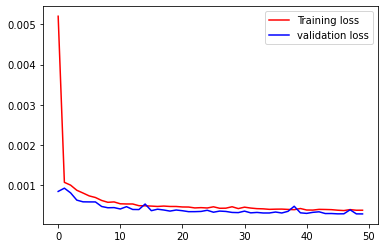

<Figure size 720x432 with 0 Axes>

In [83]:
import matplotlib.pyplot as plt
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.legend()
plt.figure(figsize=(10,6))
plt.show()

In [84]:
#lets do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape,test_predict.shape

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


((1795, 1), (374, 1))

# model evaluation

In [85]:
#Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
original_ytrain=scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest= scaler.inverse_transform(y_test.reshape(-1,1))



# Evaluation metrices RMSE,MSE and MAE

In [86]:
#evaluation metrices RMSE and MAE
print("test data RMSE:",math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("test data MSE:",mean_squared_error(original_ytest,test_predict))
print("test data MAE:",mean_absolute_error(original_ytest,test_predict))
print("-------------------------------------------------------------------------------")
print("train datat RMSE:",math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("train data MSE:",mean_squared_error(original_ytrain,train_predict))
print("train data MAE:",mean_absolute_error(original_ytrain,train_predict))

test data RMSE: 103.90584507121399
test data MSE: 10796.424639963125
test data MAE: 70.13440626697235
-------------------------------------------------------------------------------
train datat RMSE: 117.02953470043816
train data MSE: 13695.91199220106
train data MAE: 64.14380689211025


# variance regression score

In [87]:
print("train data explained variance regression score:",explained_variance_score(original_ytrain,train_predict))
print("test data explained variance regressio score:",explained_variance_score(original_ytest,test_predict))

train data explained variance regression score: 0.9858535629038472
test data explained variance regressio score: 0.981463027383337


# r square score for regression

In [88]:
print("Train data r2 score;",r2_score(original_ytrain,train_predict))
print("test data r2 score;",r2_score(original_ytest,test_predict))

Train data r2 score; 0.9858204072357496
test data r2 score; 0.9814575797318089


In [89]:
#comparision of Bitcoin close price and predicted close price
#shift train predicction for plotting
look_back=time_step
trainpredictplot=np.empty_like(closedf)
trainpredictplot[:,:]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:]=train_predict
print("train predicted data :",trainpredictplot)
#shift test prediction for plotting
testpredictplot=np.empty_like(closedf)
testpredictplot[:,:]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(closedf)-1,:]=test_predict
print("train predicted data :",testpredictplot)

names=cycle(['original close price','train predicted close price','test predicted close price'])
plotdf=pd.DataFrame({'date':close_stock['date'],'original_close':close_stock['close'],
                    'train_predicted_close':trainpredictplot.reshape(1,-1)[0].tolist(),
                  'test_predicted_close':testpredictplot.reshape(1,-1)[0].tolist()})
fig=px.line(plotdf,x=plotdf['date'],y=[plotdf['original_close'],plotdf['train_predicted_close'],plotdf['test_predicted_close']],
           labels={'value':'stock price','data':'date'})
fig.update_layout(title_text='comparision between original close price and predicted close price',plot_bgcolor='white',font_color='black',legend_title_text='close price')
fig.for_each_trace(lambda t:t.update(name=next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

train predicted data : [[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]
train predicted data : [[          nan]
 [          nan]
 [          nan]
 ...
 [2489.31738281]
 [2514.40087891]
 [          nan]]


# predicting next 365 days

In [100]:
x_input= test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array
lst_output=[]
n_steps=time_step
i=0
pred_days=365
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{}day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape(1,n_steps,1)
        
        yhat=model.predict(x_input,verbose=0)
        #print("{}day output{}".format(i,yaht))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
print("output of predicted next days:",len(lst_output))


output of predicted next days: 365


In [101]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
#print(last_days)
#print(day_pred)

In [102]:
temp_mat=np.empty((len(last_days)+pred_days+1,1))
temp_mat[:]=np.nan
temp_mat=temp_mat.reshape(1,-1).tolist()[0]
last_original_days_value=temp_mat
next_predicted_days_value=temp_mat
last_original_days_value[0:time_step+1]=scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:]=scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot=pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names=cycle(['last 25 days close price','predicted next 365 days close price'])
fig=px.line(new_pred_plot,x=new_pred_plot.index,y=[new_pred_plot['last_original_days_value'],new_pred_plot['next_predicted_days_value']],
           labels={'value':'stock price','index':'timestamp'})
fig.update_layout(title_text='compare last 25 days and next 365 days',plot_bgcolor='white',font_size=15,font_color='black',legend_title_text='close price')
fig.for_each_trace(lambda t: t.update(name=next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [103]:
#new_pred_plot

In [104]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]
names=cycle(['close price'])
fig=px.line(lstmdf,labels={'value':'stock price','index':'timestamp'})
fig.update_layout(title_text='plotting whole closing stock price with prediction',plot_bgcolor='white',font_size=15,font_color='black',legend_title_text='stock')
fig.for_each_trace(lambda t: t.update(name=next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()
